In [1]:
#pip install matplotlib

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("C:\Musfique's Folder\Study\OOP\Dataset\Employee.csv")
df.head(5)

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\PC\AppData\Local\Temp\ipykernel_13104\2410058346.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("C:\Musfique's Folder\Study\OOP\Dataset\Employee.csv")


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
df.shape

(4653, 9)

## Making a Pie Chart for Gender

In [5]:
male = df.loc[df['Gender'] == "Male"]
female = df.loc[df["Gender"] == "Female"]

num_male = male.shape[0]
num_female = female.shape[0]
num_total = df.shape[0]

male_percentage = (num_male / num_total) * 100
female_percentage = (num_female / num_total) * 100

percentages = {
    'Gender' : ['Male', 'Female'],
    'Percentage' : [male_percentage, female_percentage]
}


percentage_df = pd.DataFrame(percentages)
percentage_df


,Gender,Percentage
0,Male,59.703417
1,Female,40.296583


([<matplotlib.patches.Wedge at 0x23bfc8a8e00>,
 [Text(-0.3301566889205017, 1.0492838323166194, 'Male'),
  Text(0.33015678716154256, -1.0492838014051147, 'Female')])

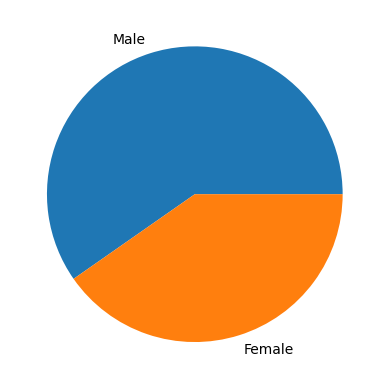

In [6]:
plt.pie(percentage_df['Percentage'], labels = percentage_df['Gender'])

In [7]:
df_copy = df.copy()
df_copy['Gender_count'] = df_copy.index
df_copy.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Gender_count
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,2
3,Masters,2016,Bangalore,3,27,Male,No,5,1,3
4,Masters,2017,Pune,3,24,Male,Yes,2,1,4


In [8]:
gender_count = df_copy.groupby('Gender')['Gender_count'].count()
gender_count

Gender
Female    1875
Male      2778
Name: Gender_count, dtype: int64

In [9]:
gender_count_df = pd.DataFrame(gender_count)
gender_count_df

,Gender_count
Gender,
Female,1875
Male,2778


In [10]:
gender_count_df['Gender Percentage'] = (gender_count_df['Gender_count']/df.shape[0])*100
gender_count_df = gender_count_df.reset_index()
gender_count_df

,Gender,Gender_count,Gender Percentage
0,Female,1875,40.296583
1,Male,2778,59.703417


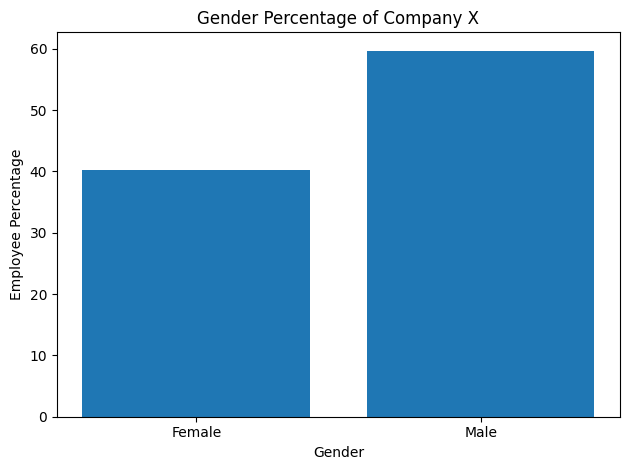

In [11]:
plt.title("Gender Percentage of Company X")
plt.xlabel('Gender')
plt.ylabel('Employee Percentage')

plt.bar(gender_count_df['Gender'], gender_count_df['Gender Percentage'])
plt.tight_layout()
plt.show()

## Making a Bar Chart for the Ages

In [12]:
age_over_30 = df.query('Age > 30')
age_over_30

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
6,Bachelors,2015,New Delhi,3,38,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34,Female,No,2,1
9,Masters,2017,New Delhi,2,37,Male,No,2,0
...,...,...,...,...,...,...,...,...,...
4643,Bachelors,2013,Bangalore,3,31,Female,No,5,0
4644,Bachelors,2015,Pune,3,32,Female,Yes,1,1
4645,Masters,2017,Pune,2,31,Female,No,2,0
4649,Masters,2013,Pune,2,37,Male,No,2,1


In [13]:
min_age = df['Age'].min()
min_age

22

In [14]:
max_age = df['Age'].max()
max_age

41

In [15]:

df_copy['Count'] = df['Age'].copy()


## Making a chart for Employee joined each year

In [16]:
df['JoiningYear'].unique()

array([2017, 2013, 2014, 2016, 2015, 2012, 2018], dtype=int64)

In [17]:
df['JoiningYear'].value_counts()

JoiningYear
2017    1108
2015     781
2014     699
2013     669
2016     525
2012     504
2018     367
Name: count, dtype: int64

In [18]:
df_copy['Employee Joined'] = df.index
df_copy.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Gender_count,Count,Employee Joined
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,0,34,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1,1,28,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,2,38,2
3,Masters,2016,Bangalore,3,27,Male,No,5,1,3,27,3
4,Masters,2017,Pune,3,24,Male,Yes,2,1,4,24,4


In [19]:
join_count = df_copy.groupby('JoiningYear')['Employee Joined'].count()
join_count

JoiningYear
2012     504
2013     669
2014     699
2015     781
2016     525
2017    1108
2018     367
Name: Employee Joined, dtype: int64

In [22]:
emp_count_df = pd.DataFrame(join_count).reset_index()
emp_count_df

,JoiningYear,Employee Joined
0,2012,504
1,2013,669
2,2014,699
3,2015,781
4,2016,525
5,2017,1108
6,2018,367


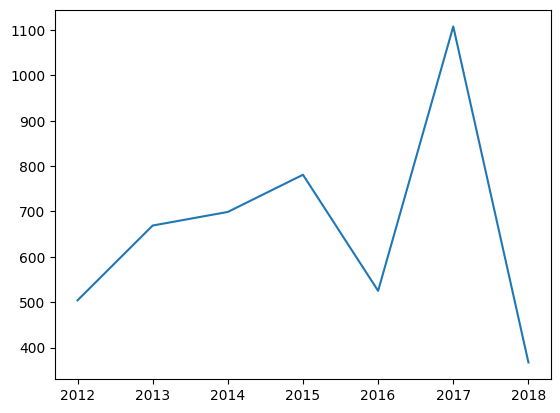

In [23]:
plt.plot(emp_count_df['JoiningYear'], emp_count_df['Employee Joined'])

## Making a cart for Education Qualification

In [ ]:
df['Education'].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [ ]:
df_copy['Degree Count'] = df.index
df_copy.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Gender_count,Count,Employee Joined,Degree Count
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,0,34,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1,1,28,1,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,2,38,2,2
3,Masters,2016,Bangalore,3,27,Male,No,5,1,3,27,3,3
4,Masters,2017,Pune,3,24,Male,Yes,2,1,4,24,4,4


In [ ]:
education_qlt = df_copy.groupby('Education')['Degree Count'].count()
education_qlt

Education
Bachelors    3601
Masters       873
PHD           179
Name: Degree Count, dtype: int64

In [ ]:
education_qlt_df = pd.DataFrame(education_qlt).reset_index()
education_qlt_df

,Education,Degree Count
0,Bachelors,3601
1,Masters,873
2,PHD,179


([<matplotlib.patches.Wedge at 0x1bceb932540>,
 [Text(-0.8339938327729642, 0.717254687608705, 'Bachelors'),
  Text(0.7414365502177903, -0.812571130425603, 'Masters'),
  Text(1.091976340489445, -0.13261851986536485, 'PHD')])

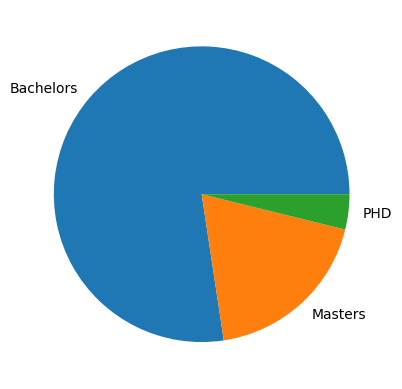

In [ ]:
plt.pie(education_qlt_df['Degree Count'], labels = education_qlt_df['Education'])

In [ ]:
education_qlt_df['Degree Percentage'] = (education_qlt_df['Degree Count'] / df.shape[0]) * 100
education_qlt_df

,Education,Degree Count,Degree Percentage
0,Bachelors,3601,77.390931
1,Masters,873,18.762089
2,PHD,179,3.846980


([<matplotlib.patches.Wedge at 0x1bcee83ca10>,
 [Text(-0.8339939670814104, 0.7172545314404166, 'Bachelors'),
  Text(0.7414368925705231, -0.8125708180431824, 'Masters'),
  Text(1.0919764041246092, -0.1326179958945563, 'PHD')])

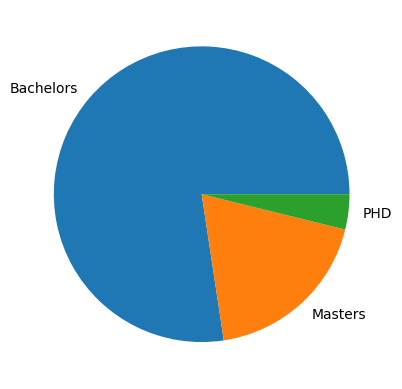

In [ ]:
plt.pie(education_qlt_df['Degree Percentage'], labels = education_qlt_df['Education'])